#EDA part 2

This code is an EDA part 2.

**On this part we will do:**

* Data Preparation: The code imports libraries and loads data from CSV files for three years (2019, 2020, and 2021) and PROMs file.

* Data Cleaning: It cleans and preprocesses the data, making text lowercase, creating new columns, and handling missing values.

* Encoding:
    * Categorical columns are encoded using target encoding for selected columns and label encoding for 'gender'.
    * Categorical columns were encoded using one hot encoded.

* Feature Selection: Specific columns are chosen for analysis, both with and without encoding.

* Combining Data: Data from different years is merged into a single DataFrame with a 'Year' column.

* Data Visualization: Visualizations are created to understand the data.

**The input files:**

* 4 files

**The outpot files:**

* 1 target encoded df

* 1 hot encoding df


#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files




#Import the files

In [ ]:
df_2019_modified = pd.read_csv('df_2019_modified.csv')

In [ ]:
df_2020_modified = pd.read_csv('df_2020_modified.csv')

In [ ]:
df_2021_modified = pd.read_csv('df_2021_modified.csv')

In [ ]:
df_proms = pd.read_csv('proms_translated.csv')

<ipython-input-6-1abf071defaa>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_proms = pd.read_csv('proms_translated.csv')


# changing the background column

create a new coulmn that contain the number of diseases for a patient

In [ ]:
df_list = [df_2019_modified, df_2020_modified, df_2021_modified]
# Loop over each DataFrame and change all the values to lowercase
for df in df_list:
   df['Background diseases/diagnoses'] = df['Background diseases/diagnoses'].astype(str)
   df['Background diseases/diagnoses'] = df['Background diseases/diagnoses'].str.lower()


examine the background columns on the dfs to create a list of the relevant Background diseases

In [ ]:
df_2019_modified['Background diseases/diagnoses'].value_counts().head(50)

morbid obesity                                                         522
obesity                                                                 77
morbid obesity, hypertension                                            60
mo                                                                      49
nan                                                                     46
morbid obesity, hypothyroidism                                          31
metabolic syndrome                                                      29
morbid obesity, obesity                                                 23
asthma, morbid obesity                                                  23
oa                                                                      20
mo, obesity                                                             20
rt hip pain                                                             13
diabetes mellitus hypertension, morbid obesity                          11
diabetes mellitus, morbid

In [ ]:
df_2020_modified['Background diseases/diagnoses'].value_counts().head(50)

morbid obesity                                                   511
obesity                                                           97
mo                                                                48
nan                                                               45
morbid obesity, hypertension                                      42
morbid obesity, hypothyroidism                                    30
metabolic syndrome                                                29
m. obesity                                                        26
asthma, morbid obesity                                            21
diabetes mellitus, morbid obesity                                 15
morbid obesity, obesity                                           15
fatty liver, morbid obesity                                       14
morbid  obesity                                                   10
obesity, hypertension                                             10
oa                                

In [ ]:
df_2021_modified['Background diseases/diagnoses'].value_counts().head(50)

morbid obesity                                                         440
obesity                                                                 96
mo                                                                      61
nan                                                                     49
morbid obesity, hypertension                                            34
morbid obesity, obesity                                                 29
asthma, morbid obesity                                                  26
metabolic syndrome                                                      25
mo, obesity                                                             22
morbid  obesity                                                         20
m. obesity                                                              18
morbid obesity, hypothyroidism                                          16
oa                                                                      14
diabetes mellitus hyperte

In [ ]:
#list of relveant diseases
relevant_diseases = ['morbid obesity','oa', 'mo','obesity','arthropathy','tkr','pkr','diabetes','thr', 'hypertension','hypercholesterolemia' ,
              'hypothyroidism','metabolic syndrome', 'hyperlipidemia', 'pain','osteoprosis','osteoarthritis','Hyperparathyroidism','trauma','bph','anemia','anxiety','tuberculosis','reflux','arthropathy of knee',
                   'osteoartrosis', 'asthma' ,'fatty liver','prediabetes','m.o.']

In [ ]:
# Function to count the number of relevant diseases in the background column
def count_relevant_diseases(background_diseases):
    invalid_characters = ['*', '-', '.', '=', '/']

    if not background_diseases or any(char in background_diseases for char in invalid_characters):
        return 0
    else:
        diseases = background_diseases.split(', ')
        count = 0
        for disease in diseases:
            for relevant_disease in relevant_diseases:
                if relevant_disease in disease:
                    count += 1
                    break  # Exit the inner loop when a relevant disease is found
        return count


In [ ]:
# Apply the function to create the "num_background_diseases" column
for df in df_list:
  df['num_background_diseases'] = df['Background diseases/diagnoses'].apply(count_relevant_diseases)



#proccses the 'type of anesthesia" coulmn


The use of multiple types of anesthesia during a single surgery is known as "multimodal anesthesia" or "combination anesthesia." This approach is employed for various reasons, often to optimize the patient's comfort, minimize pain, and enhance the surgical process.

In this section we will create a column that contains information on how many different types of anesthesia the patient underwent

First we will check what types of anesthesia the patients underwent in each of the files and then we will create a column that contains the amount

In [ ]:
df_2019_modified['type of anesthesia'].value_counts()

General                             2682
Spinal, Sedation                    1219
Spinal                               537
Block, General                       218
Spinal, Block, Sedation              127
Spinal, Sedation, Block               94
Spinal, General                       86
Spinal, Sedation, General             44
Spinal, Block                         44
Local, General                        21
Sedation, General                      8
Spinal, Sedation, Block, General       7
Spinal, Block, General                 4
Spinal, Sedation, Epidural             3
Spinal, Sedation, Local                3
Sedation, Local, General               3
Block                                  3
Sedation                               2
Spinal, Sedation, MAC                  2
Sedation, Block, General               2
Spinal, Block, Local, Sedation         1
Spinal, Epidural                       1
Epidural                               1
Spinal, Bier block                     1
Caudal          

In [ ]:
# List of anesthesia types to count
anesthesia_list = ['spinal', 'general', 'sedation', 'local','block','mac','caudal','epidural']

# Function to count the number of specific anesthesia types
def count_anesthesia(anesthesia_str):
    count = 0
    for anesthesia_type in anesthesia_list:
        if anesthesia_type in anesthesia_str:
            count += 1
    return count

In [ ]:
for df in df_list:
  # Lowercase the 'Type of Anesthesia' column
  df['type of anesthesia'] = df['type of anesthesia'].str.lower()
  # Apply the function to create the 'num_of_anesthesia' column
  df['num_of_anesthesia'] = df['type of anesthesia'].apply(count_anesthesia)

#Vizualize the data

In this section we will visually examine our data.
We will look at the data separately and examine each of the years and in addition we will also look at the total data.
We would like to see trends and characteristics of the data.

##2019#

Statistics on the data

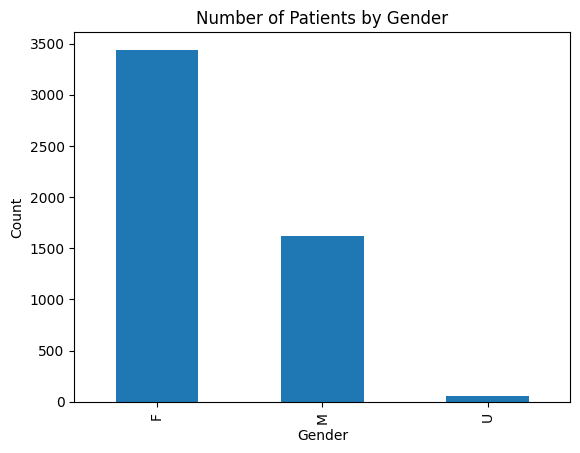

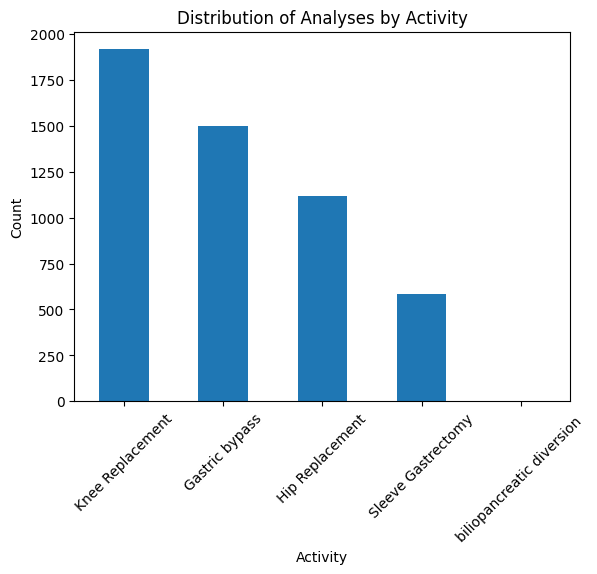

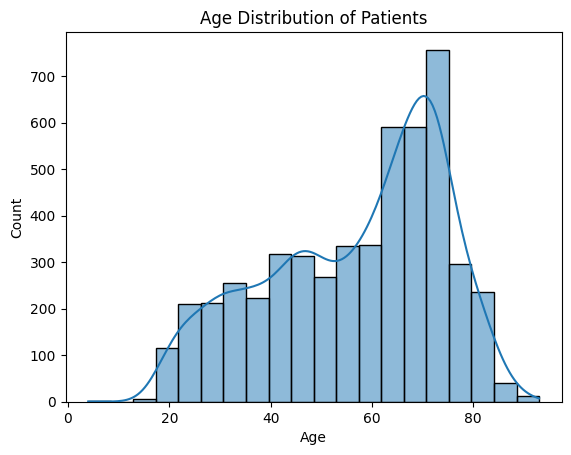

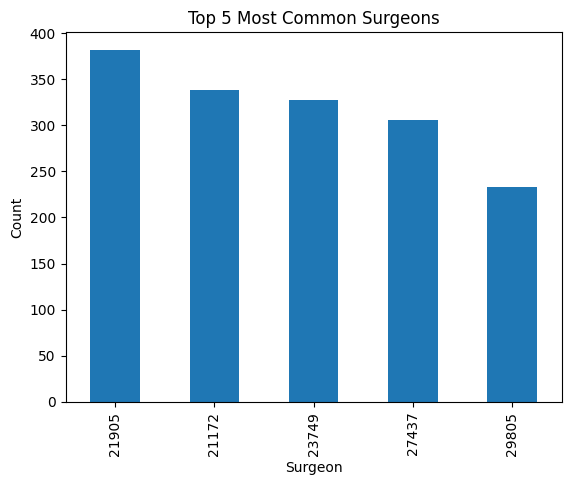

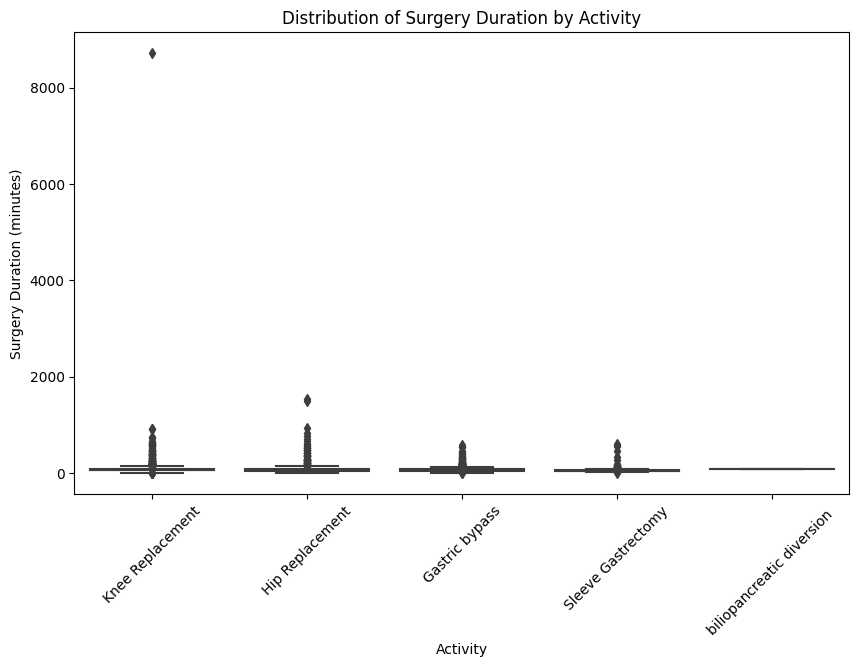

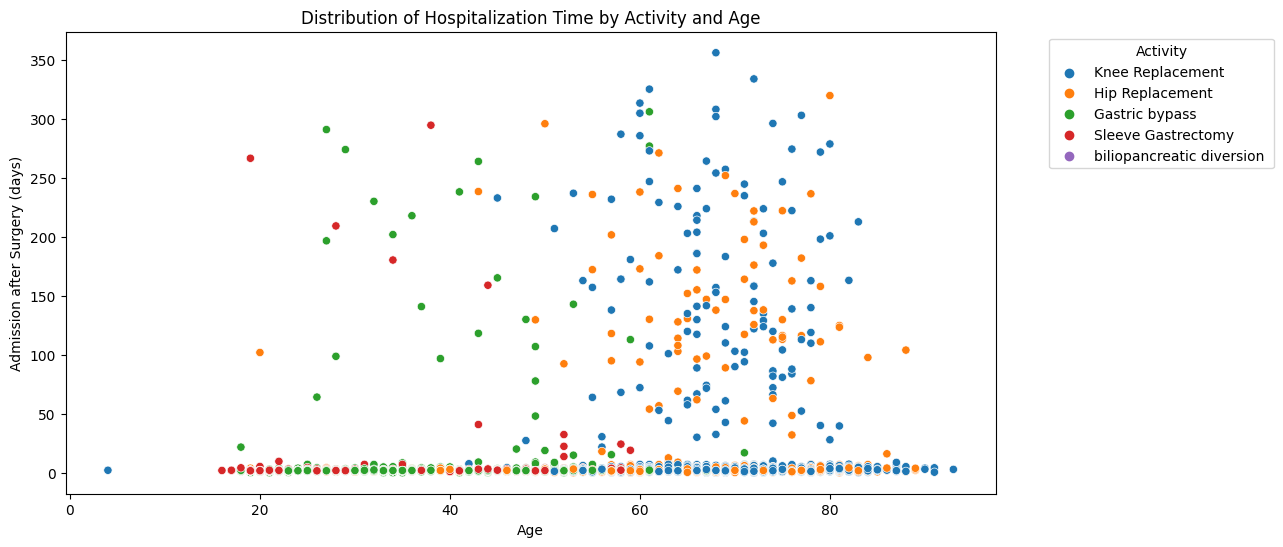

In [ ]:

df = df_2019_modified

# 1. Number of patients according to the "gender" column - in a column graph.
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', title='Number of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Distribution of analyzes according to the "activity" column in a column graph.
activity_counts = df['activity'].value_counts()
activity_counts.plot(kind='bar', title='Distribution of Analyses by Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# 3. The age distribution of the patients in the file according to the "age" column.
sns.histplot(data=df, x='Patient age (on the day of surgery)', bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 4. Who are the 5 most common surgeons according to the "chief code" column.
top_surgeons = df['Chief surgeon code'].value_counts().head(5)
top_surgeons.plot(kind='bar', title='Top 5 Most Common Surgeons')
plt.xlabel('Surgeon')
plt.ylabel('Count')
plt.show()

# 5. Distribution of surgery times in minutes "surgery_duration_minutes" according to the type of surgery "activity".
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


# 6. Distribution of hospitalization time "admission after surgery" according to the type of surgery and age.
# Convert hours to days for better vizualization
df['days_admitted_after_surgery'] = df['hours_admitted_after_surgery'] / 24.0

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Patient age (on the day of surgery)', y='days_admitted_after_surgery', hue='activity')
plt.title('Distribution of Hospitalization Time by Activity and Age')
plt.xlabel('Age')
plt.ylabel('Admission after Surgery (days)')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Outliers

Dealing with outliers

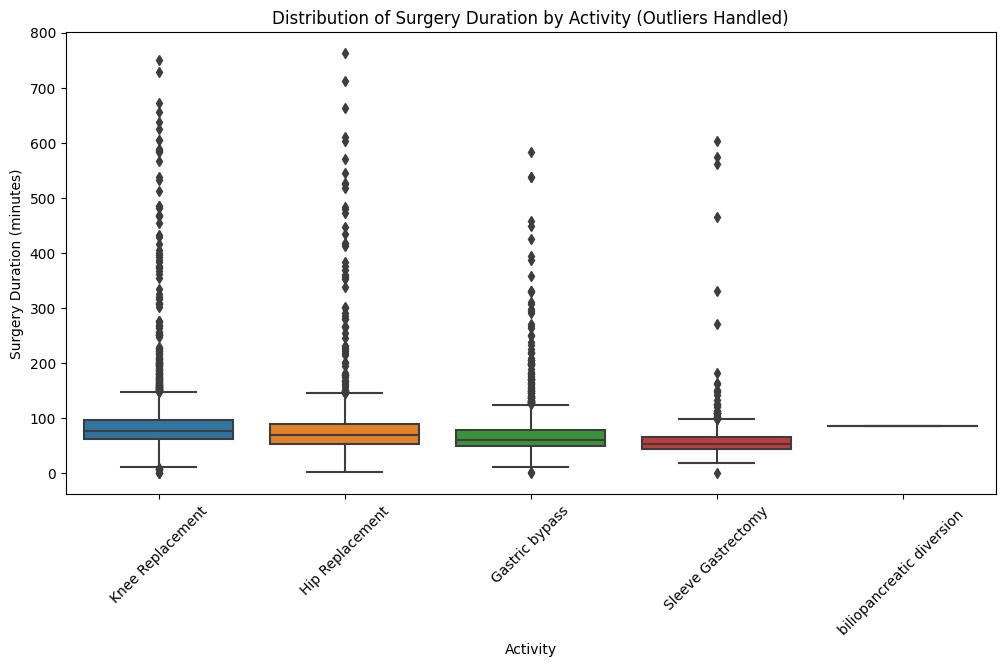

In [ ]:
# Identify and handle outliers
df = df_2019_modified

# Identify surgeries with duration greater than 800 minutes
outlier_condition = df['surgery_duration_minutes'] > 800
outliers = df[outlier_condition]

# Calculate the average surgery duration for each activity
average_durations = df.groupby('activity')['surgery_duration_minutes'].mean().to_dict()

# Replace outliers with the average duration for the corresponding activity
df.loc[outlier_condition, 'surgery_duration_minutes'] = df.loc[outlier_condition, 'activity'].map(average_durations)

# Check if outliers are successfully handled
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity (Outliers Handled)')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

##2020#

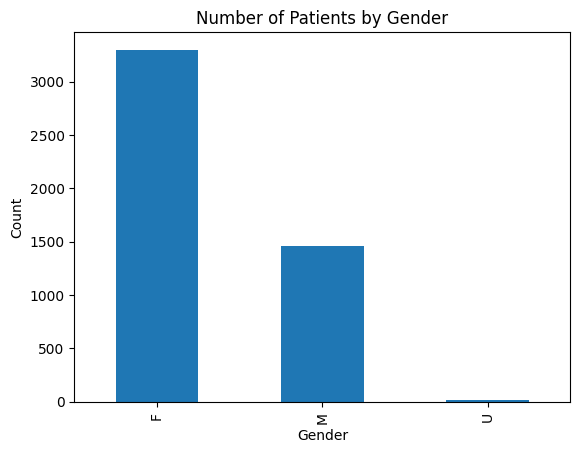

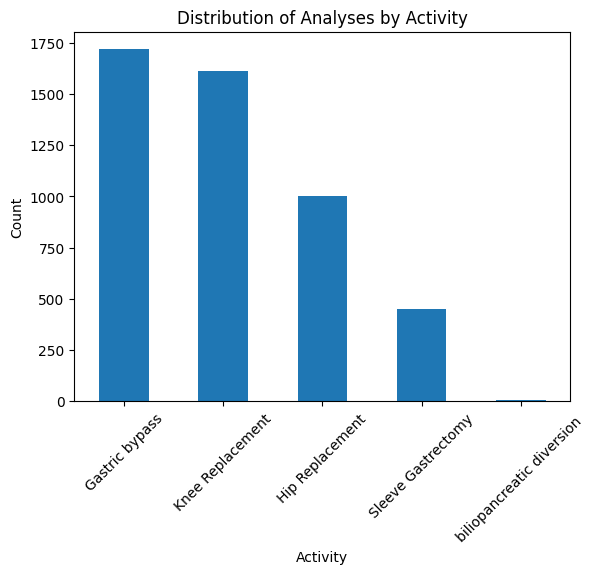

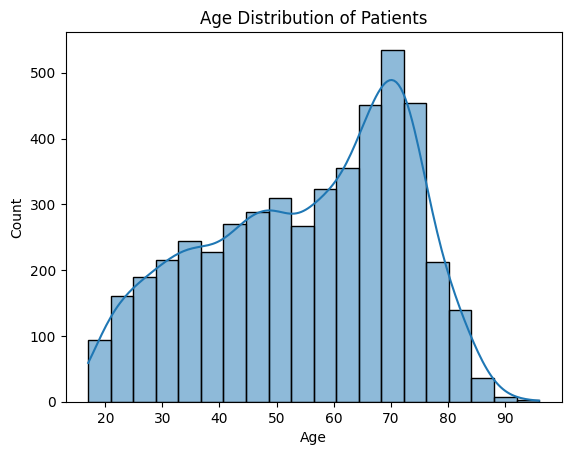

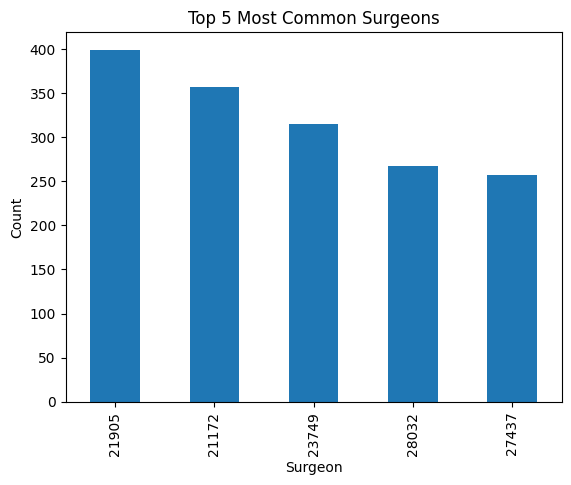

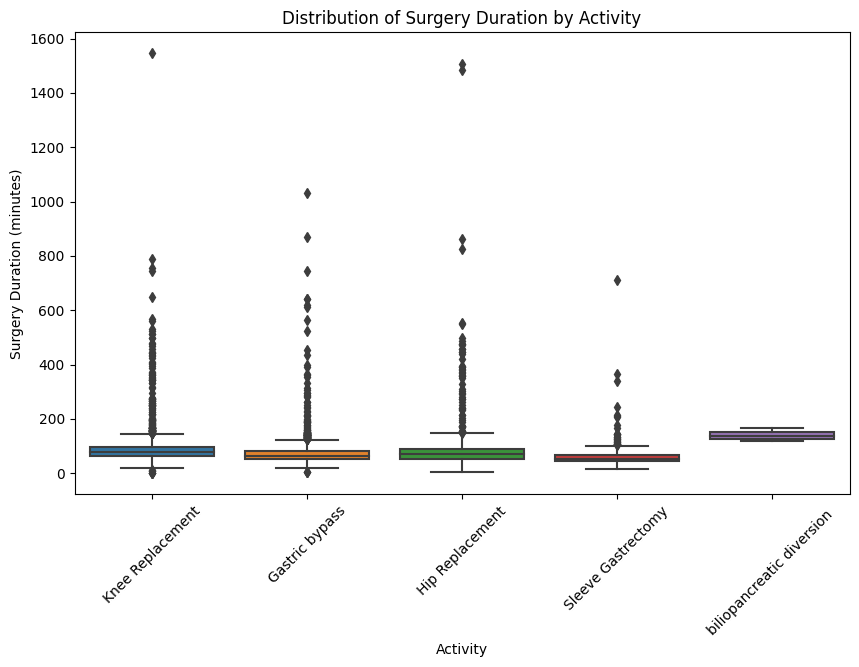

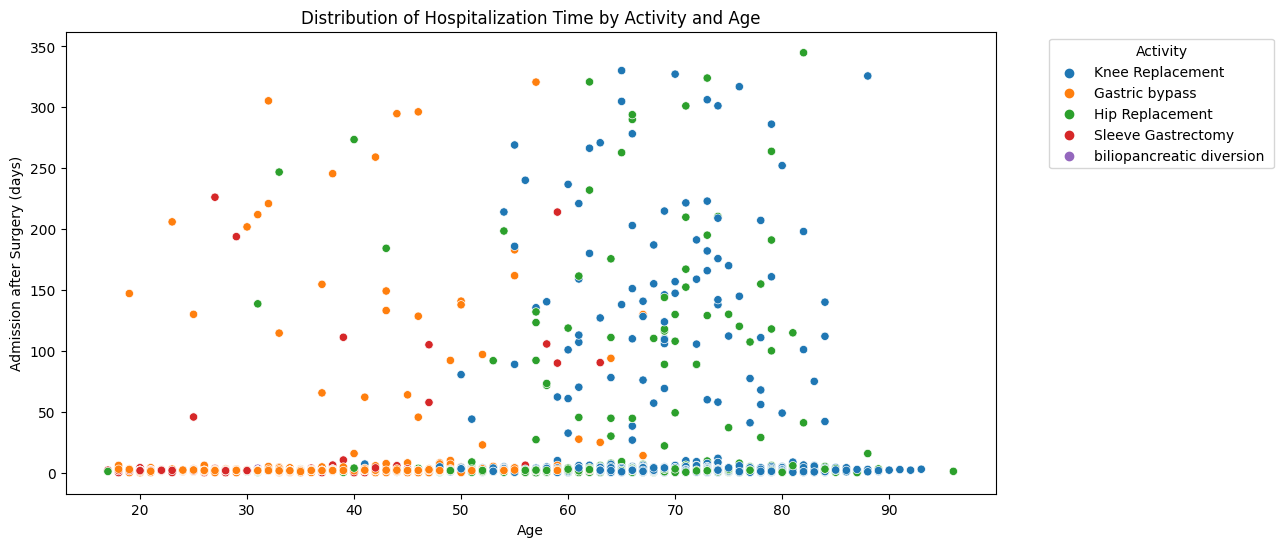

In [ ]:

df = df_2020_modified

# 1. Number of patients according to the "gender" column - in a column graph.
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', title='Number of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Distribution of analyzes according to the "activity" column in a column graph.
activity_counts = df['activity'].value_counts()
activity_counts.plot(kind='bar', title='Distribution of Analyses by Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# 3. The age distribution of the patients in the file according to the "age" column.
sns.histplot(data=df, x='Patient age (on the day of surgery)', bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 4. Who are the 5 most common surgeons according to the "chief code" column.
top_surgeons = df['Chief surgeon code'].value_counts().head(5)
top_surgeons.plot(kind='bar', title='Top 5 Most Common Surgeons')
plt.xlabel('Surgeon')
plt.ylabel('Count')
plt.show()

# 5. Distribution of surgery times in minutes "surgery_duration_minutes" according to the type of surgery "activity".
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


# 6. Distribution of hospitalization time "admission after surgery" according to the type of surgery and age.
# Convert hours to days for better vizualization
df['days_admitted_after_surgery'] = df['hours_admitted_after_surgery'] / 24.0

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Patient age (on the day of surgery)', y='days_admitted_after_surgery', hue='activity')
plt.title('Distribution of Hospitalization Time by Activity and Age')
plt.xlabel('Age')
plt.ylabel('Admission after Surgery (days)')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Outliers

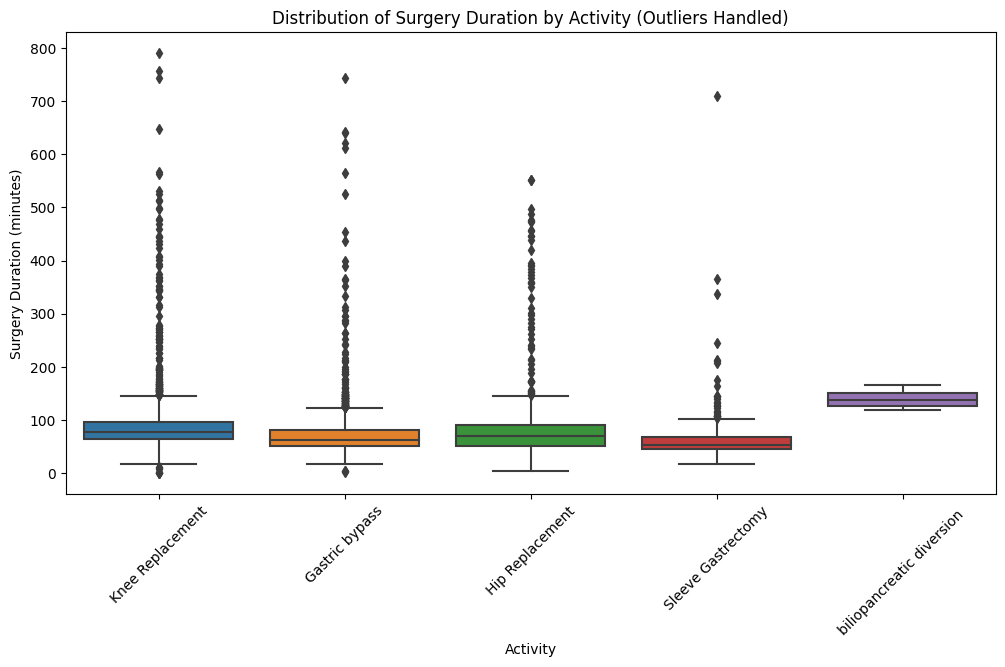

In [ ]:
# Identify and handle outliers
df = df_2020_modified

# Identify surgeries with duration greater than 800 minutes
outlier_condition = df['surgery_duration_minutes'] > 800
outliers = df[outlier_condition]

# Calculate the average surgery duration for each activity
average_durations = df.groupby('activity')['surgery_duration_minutes'].mean().to_dict()

# Replace outliers with the average duration for the corresponding activity
df.loc[outlier_condition, 'surgery_duration_minutes'] = df.loc[outlier_condition, 'activity'].map(average_durations)

# Check if outliers are successfully handled
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity (Outliers Handled)')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

##2021

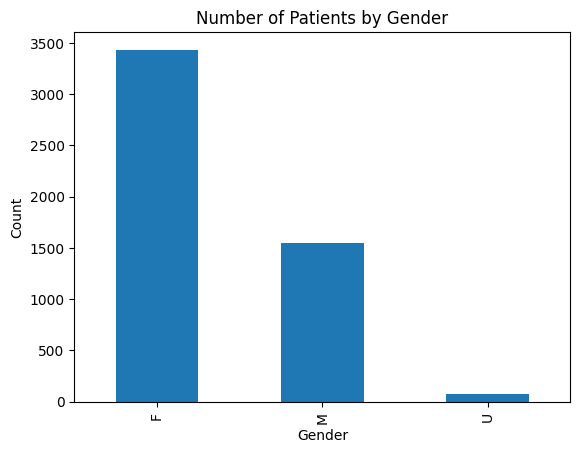

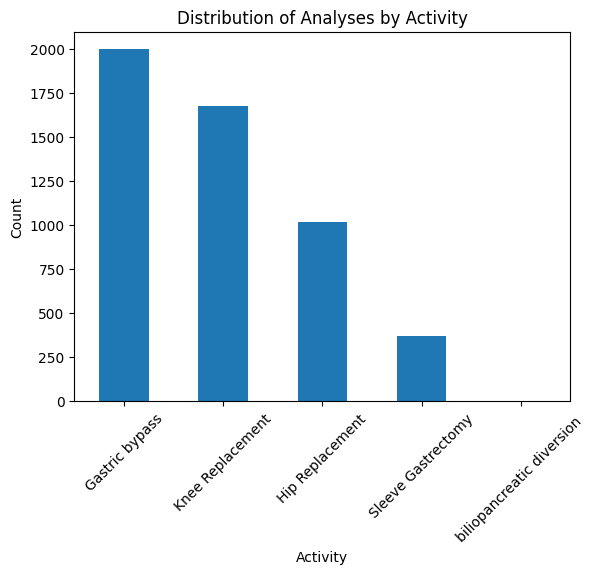

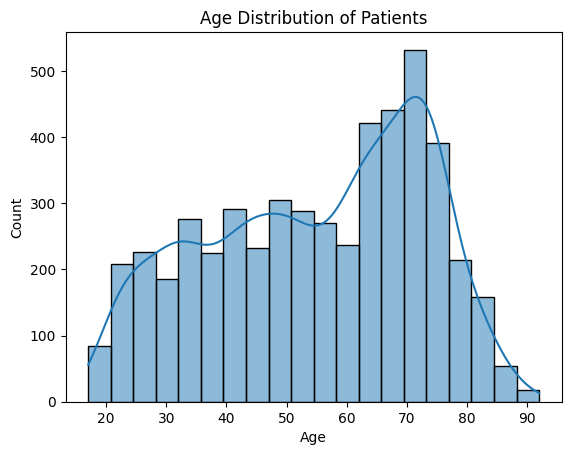

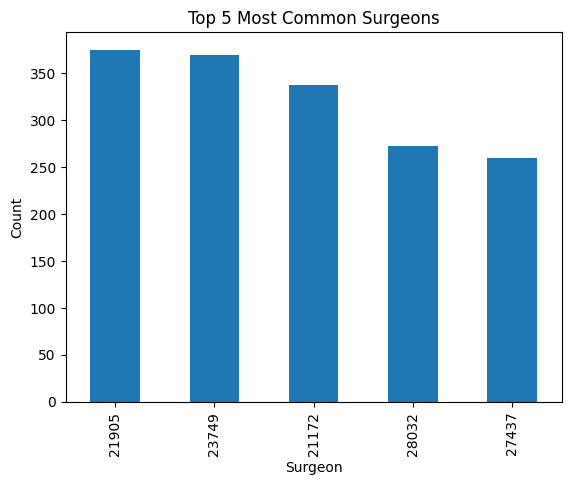

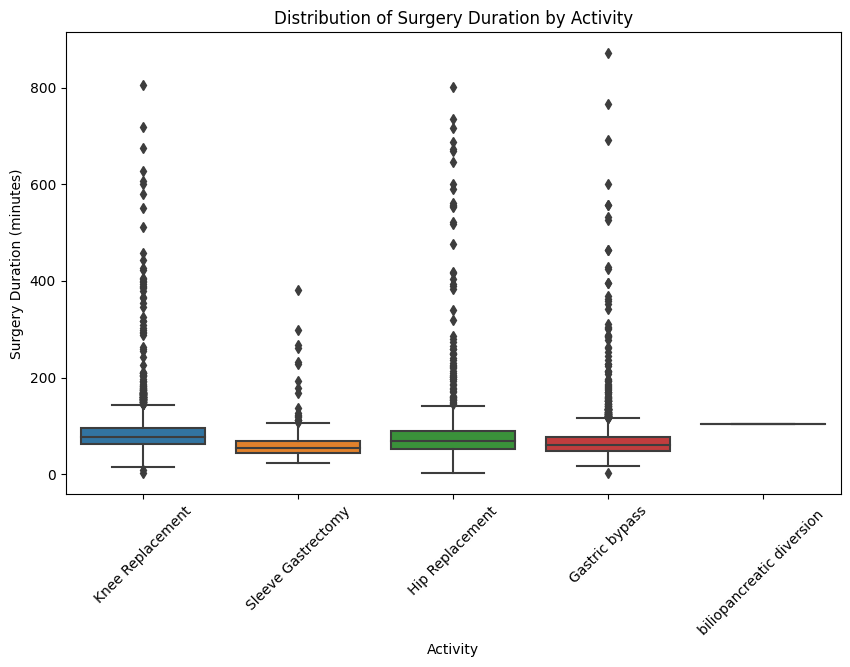

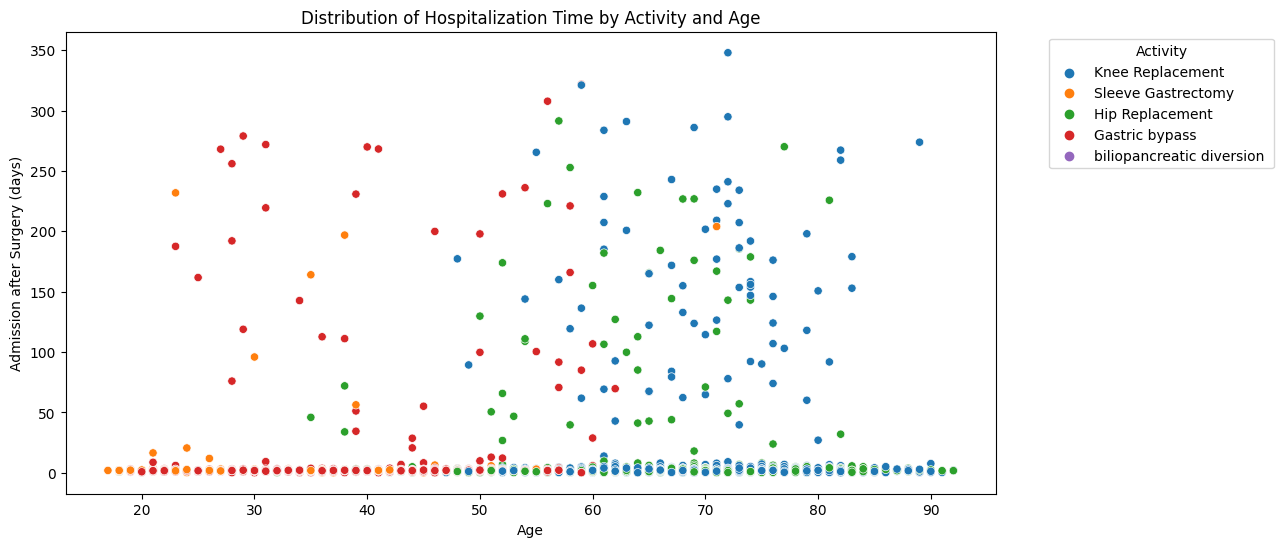

In [ ]:

df = df_2021_modified

# 1. Number of patients according to the "gender" column - in a column graph.
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', title='Number of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Distribution of analyzes according to the "activity" column in a column graph.
activity_counts = df['activity'].value_counts()
activity_counts.plot(kind='bar', title='Distribution of Analyses by Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# 3. The age distribution of the patients in the file according to the "age" column.
sns.histplot(data=df, x='Patient age (on the day of surgery)', bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 4. Who are the 5 most common surgeons according to the "chief code" column.
top_surgeons = df['Chief surgeon code'].value_counts().head(5)
top_surgeons.plot(kind='bar', title='Top 5 Most Common Surgeons')
plt.xlabel('Surgeon')
plt.ylabel('Count')
plt.show()

# 5. Distribution of surgery times in minutes "surgery_duration_minutes" according to the type of surgery "activity".
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# 6. Distribution of hospitalization time "admission after surgery" according to the type of surgery and age.
# Convert hours to days for better vizualization
df['days_admitted_after_surgery'] = df['hours_admitted_after_surgery'] / 24.0

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Patient age (on the day of surgery)', y='days_admitted_after_surgery', hue='activity')
plt.title('Distribution of Hospitalization Time by Activity and Age')
plt.xlabel('Age')
plt.ylabel('Admission after Surgery (days)')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Outliers

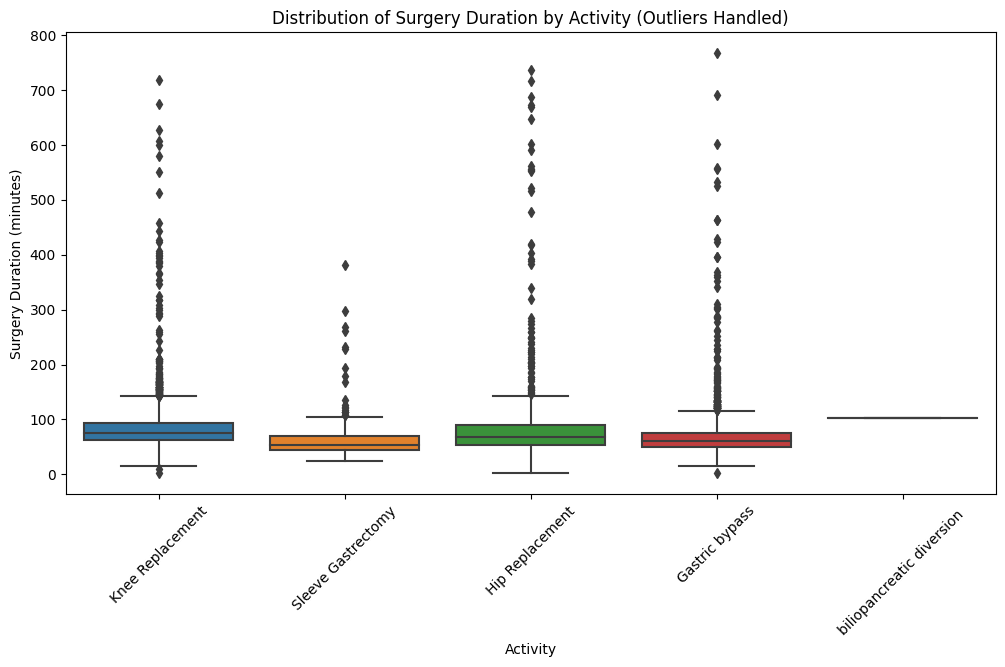

In [ ]:
# Identify and handle outliers
df = df_2021_modified

# Identify surgeries with duration greater than 800 minutes
outlier_condition = df['surgery_duration_minutes'] > 800
outliers = df[outlier_condition]

# Calculate the average surgery duration for each activity
average_durations = df.groupby('activity')['surgery_duration_minutes'].mean().to_dict()

# Replace outliers with the average duration for the corresponding activity
df.loc[outlier_condition, 'surgery_duration_minutes'] = df.loc[outlier_condition, 'activity'].map(average_durations)

# Check if outliers are successfully handled
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='activity', y='surgery_duration_minutes')
plt.title('Distribution of Surgery Duration by Activity (Outliers Handled)')
plt.xlabel('Activity')
plt.ylabel('Surgery Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

#Deal with categorical coulmns#

###Feature selection

New DataFrames with selected columns

In [ ]:
selected_columns = ['Not_ID','site code','activity', 'Chief surgeon code',
       'anesthetic code','height', 'Weight','num_of_anesthesia',
       'Patient age (on the day of surgery)','hours_admitted_after_surgery', 'num_background_diseases','surgery_duration_minutes','gender','target']

In [ ]:
df_2019_data = df_2019_modified[selected_columns]
df_2020_data = df_2020_modified[selected_columns]
df_2021_data = df_2021_modified[selected_columns]

###combine all the years to df

In [ ]:
# List of the DataFrames
dfs = [df_2019_data, df_2020_data, df_2021_data]

# List of years
years = [2019, 2020, 2021]

# Create a new column 'Year' and concatenate DataFrames
all_patient_data = pd.concat([df.assign(Year=year) for df, year in zip(dfs, years)], ignore_index=True)

# Print the combined DataFrame
all_patient_data

,Not_ID,site code,activity,Chief surgeon code,anesthetic code,height,Weight,num_of_anesthesia,Patient age (on the day of surgery),hours_admitted_after_surgery,num_background_diseases,surgery_duration_minutes,gender,target,Year
0,10001,85,Knee Replacement,29805,5830.0,1.570,80.0,1,71,42.0,2,83.0,F,1,2019
1,10002,85,Hip Replacement,29805,1189.0,1.600,76.0,2,79,42.0,2,95.0,F,1,2019
2,10003,85,Knee Replacement,29805,5830.0,1.660,84.0,1,75,25.0,2,81.0,F,1,2019
3,10004,85,Knee Replacement,29805,5830.0,1.560,70.0,1,64,39.0,0,76.0,F,1,2019
4,10007,85,Knee Replacement,35902501,5830.0,1.700,91.0,1,80,46.0,2,127.0,M,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14953,FF4433,20,Gastric bypass,35447,"6804.0, 0.0",1.565,93.0,1,59,2.0,2,64.0,F,0,2021
14954,FF80F2,60,Knee Replacement,28888,4442.0,1.730,74.0,2,75,43.0,2,111.0,M,0,2021
14955,FFA786,62,Hip Replacement,21905,6554.0,1.650,72.0,1,69,18.0,2,46.0,F,0,2021
14956,FFF052,20,Hip Replacement,21905,2566.0,1.630,66.0,2,72,6.0,2,51.0,F,0,2021


change some of the columns type

In [ ]:
all_patient_data['height'] = all_patient_data['height'].astype(float)
all_patient_data['Weight'] = all_patient_data['Weight'].astype(float)
all_patient_data['Chief surgeon code'] = all_patient_data['Chief surgeon code'].astype(object)

###Target encoded

On this part we will deal with this coulmns, we will apply our models on data with the encoded coulmns we create now, and also on data without encoding

The following columns - 'Chief surgeon code', 'anesthetic code'
We chose to encode in the form of target encoding.
  We will do this by calculating the mean of the target variable for each category in the specified column and maps it back to create a new target-encoded column.

In [ ]:
# List of categorical columns to target encode
categorical_columns = ['site code', 'activity', 'Chief surgeon code', 'anesthetic code', 'Year', 'gender']

# Function for target encoding
def perform_target_encoding(df, column, target):
    encoding_map = df.groupby(column)[target].mean().to_dict()
    return df[column].map(encoding_map)

all_patient_data_encoded = all_patient_data.copy()  # Create a copy of the original DataFrame

# Iterate through the categorical columns and perform target encoding
for column in categorical_columns:
    # Assuming perform_target_encoding returns a Series with the encoded values
    encoded_values = perform_target_encoding(all_patient_data_encoded, column, 'target')

    # Replace the original categorical column with the encoded values
    all_patient_data_encoded[column + '_encoded'] = encoded_values

# Drop the original categorical columns after encoding
all_patient_data_encoded.drop(columns=categorical_columns, inplace=True)


In [ ]:
all_patient_data_encoded

,Not_ID,height,Weight,num_of_anesthesia,Patient age (on the day of surgery),hours_admitted_after_surgery,num_background_diseases,surgery_duration_minutes,target,site code_encoded,activity_encoded,Chief surgeon code_encoded,anesthetic code_encoded,Year_encoded,gender_encoded
0,10001,1.570,80.0,1,71,42.0,2,83.0,1,0.650567,0.625336,0.691057,0.657143,0.767246,0.604109
1,10002,1.600,76.0,2,79,42.0,2,95.0,1,0.650567,0.641148,0.691057,0.669091,0.767246,0.604109
2,10003,1.660,84.0,1,75,25.0,2,81.0,1,0.650567,0.625336,0.691057,0.657143,0.767246,0.604109
3,10004,1.560,70.0,1,64,39.0,0,76.0,1,0.650567,0.625336,0.691057,0.657143,0.767246,0.604109
4,10007,1.700,91.0,1,80,46.0,2,127.0,1,0.650567,0.625336,1.000000,0.657143,0.767246,0.604621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14953,FF4433,1.565,93.0,1,59,2.0,2,64.0,0,0.601639,0.557515,0.509579,0.000000,0.203242,0.604109
14954,FF80F2,1.730,74.0,2,75,43.0,2,111.0,0,0.547475,0.625336,0.526316,0.602041,0.203242,0.604621
14955,FFA786,1.650,72.0,1,69,18.0,2,46.0,0,0.616252,0.641148,0.599481,0.250000,0.203242,0.604109
14956,FFF052,1.630,66.0,2,72,6.0,2,51.0,0,0.601639,0.641148,0.599481,0.511278,0.203242,0.604109


### One hot *encoded*

This code uses the pd.get_dummies function to one-hot encode the specified categorical columns. The resulting DataFrame (df_encoded_dummies) will have binary columns for each unique value in the categorical columns.

In [ ]:
# Specify categorical columns
categorical_columns = ['site code', 'activity', 'Chief surgeon code', 'anesthetic code', 'Year','gender']

# One-hot encode categorical columns
df_encoded_dummies = pd.get_dummies(all_patient_data, columns=categorical_columns)

# Display the updated DataFrame
print(df_encoded_dummies)

       Not_ID  height  Weight  num_of_anesthesia  \
0       10001   1.570    80.0                  1   
1       10002   1.600    76.0                  2   
2       10003   1.660    84.0                  1   
3       10004   1.560    70.0                  1   
4       10007   1.700    91.0                  1   
...       ...     ...     ...                ...   
14953  FF4433   1.565    93.0                  1   
14954  FF80F2   1.730    74.0                  2   
14955  FFA786   1.650    72.0                  1   
14956  FFF052   1.630    66.0                  2   
14957  FFF551   1.640   101.0                  1   

       Patient age (on the day of surgery)  hours_admitted_after_surgery  \
0                                       71                          42.0   
1                                       79                          42.0   
2                                       75                          25.0   
3                                       64                          39.

<ipython-input-29-7dfe6ffcb336>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded_dummies = pd.get_dummies(all_patient_data, columns=categorical_columns)


###Heatmap

<ipython-input-30-df8bf3325c1f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


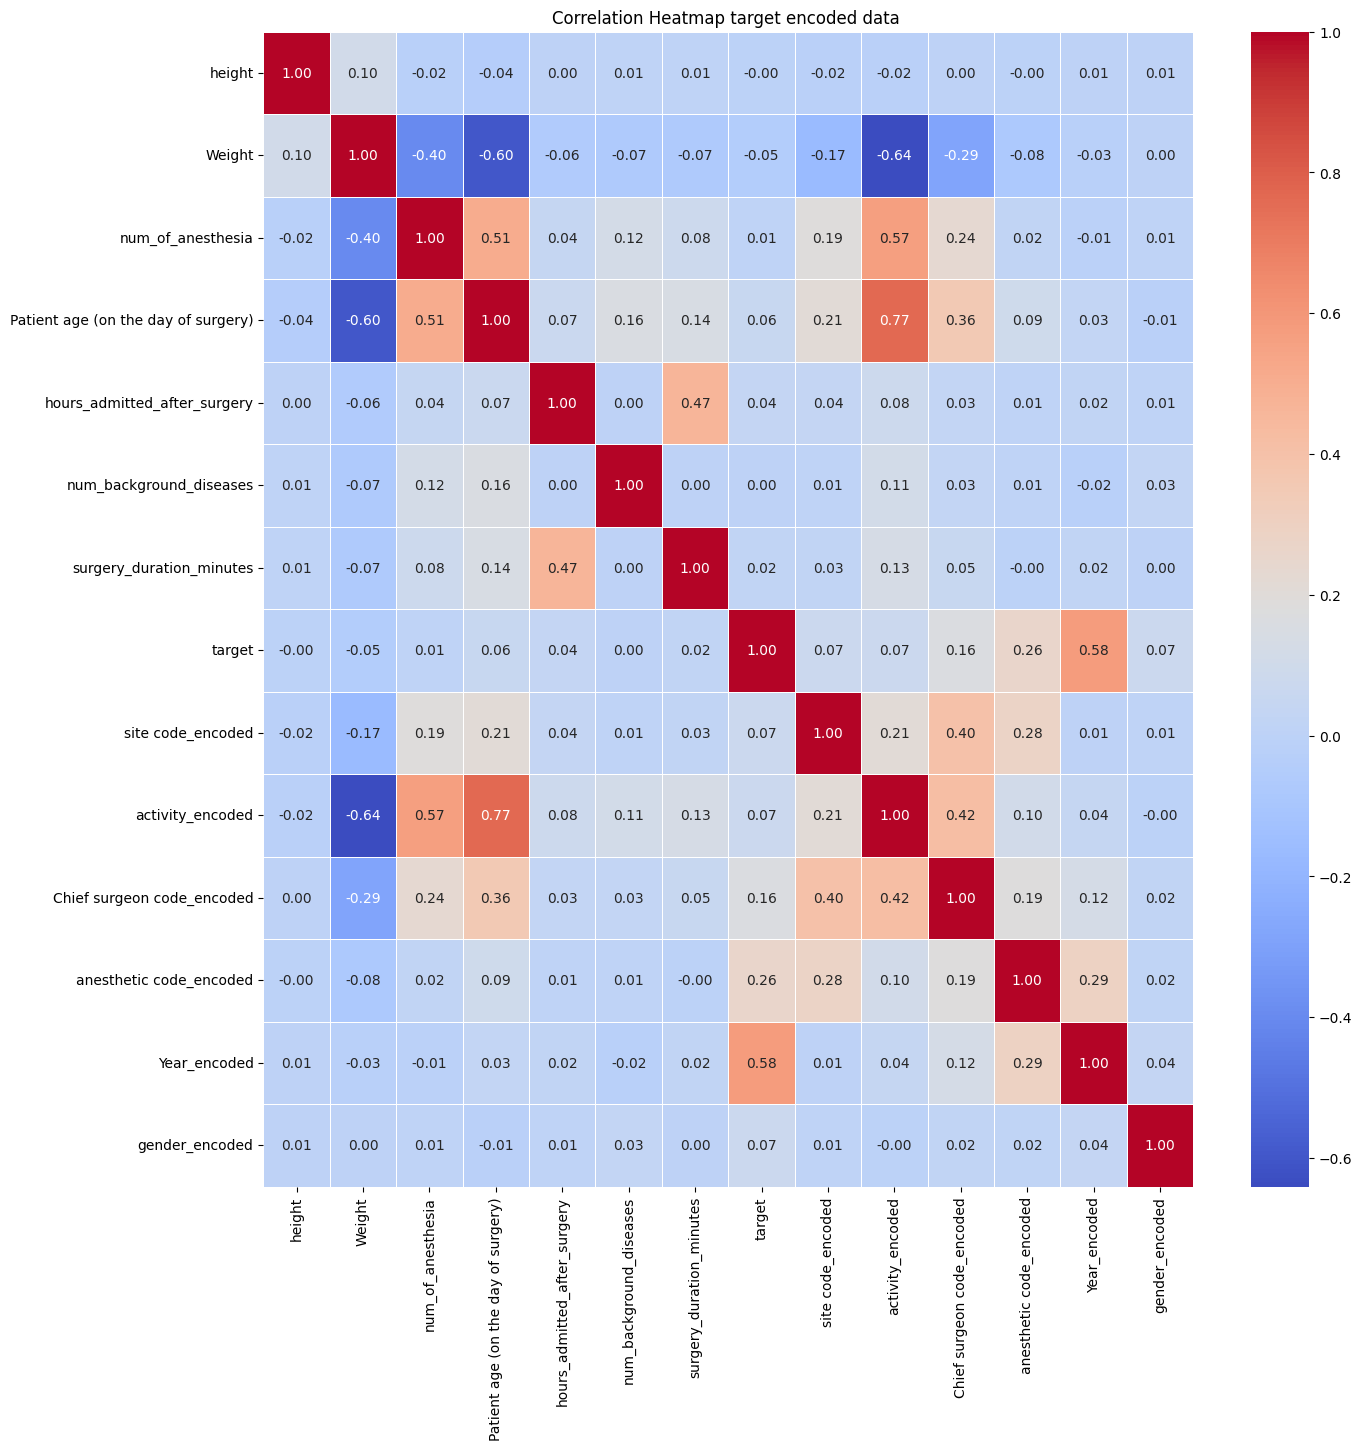

In [ ]:
# Load the data
data = all_patient_data_encoded
target_variable = 'target'

# Create a correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap target encoded data ")
plt.show()


<ipython-input-31-9eb001832878>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


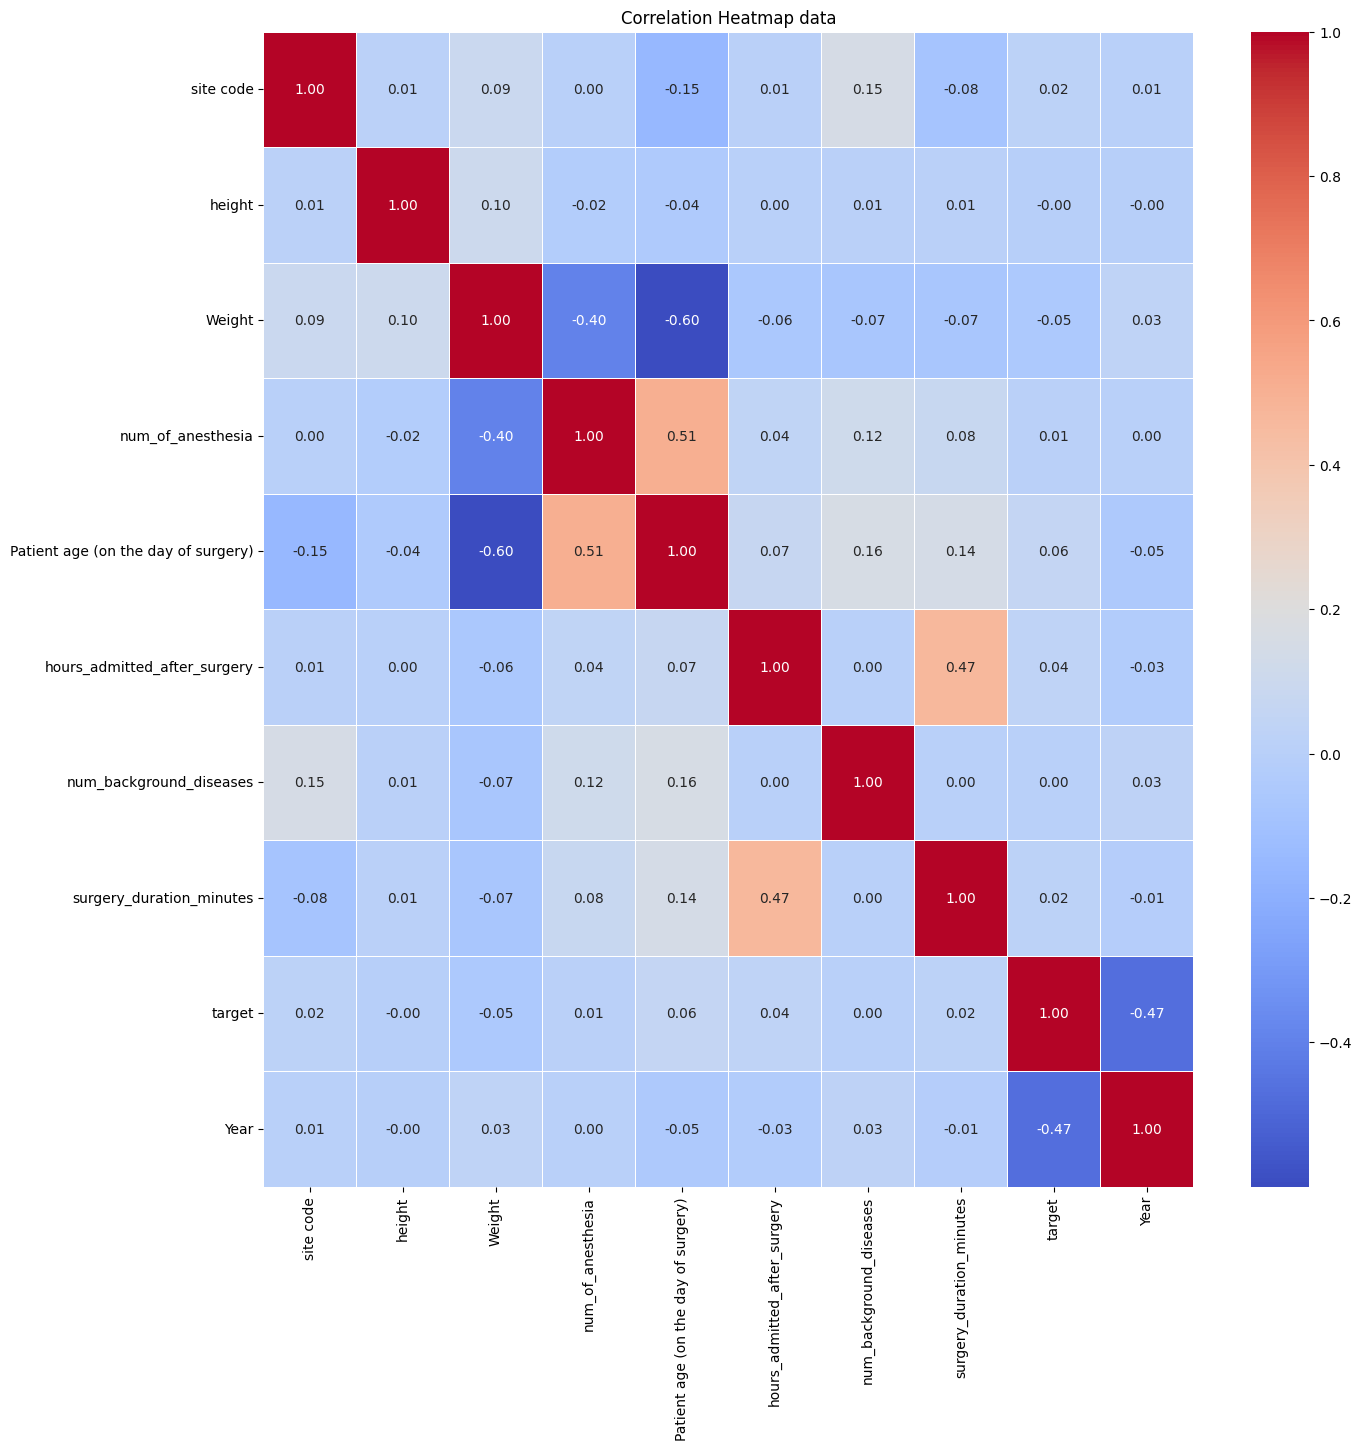

In [ ]:

# Load the data
data = all_patient_data
target_variable = 'target'

# Create a correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap data")
plt.show()

#Save the files as csv

In [ ]:
all_patient_data_encoded.to_csv("all_patient_data_encoded.csv")
df_encoded_dummies.to_csv('df_encoded_dummies.csv')


#Data info for presentaion

In [ ]:
import pandas as pd

# Assuming 'all_patient_data' is your DataFrame

# 1. Number of Patients for Each 'Site Code'
site_code_count = all_patient_data['site code'].value_counts()

# 2. Number of Patients for Each Year
year_count = all_patient_data['Year'].value_counts()

# 3. Gender Distribution
gender_distribution = all_patient_data['gender'].value_counts()

# 4. Number of Patients for Each Activity
activity_count = all_patient_data['activity'].value_counts()

# 5. Summary of Patient Age
age_summary = all_patient_data['Patient age (on the day of surgery)'].describe()

# 6. Total Number of Patients in the DataFrame
total_patients = len(all_patient_data)

# 7. Additional Important Information
# Add any additional analysis or insights based on your specific requirements

# Displaying the results
print("1. Number of Patients for Each 'Site Code':")
print(site_code_count)
print("\n2. Number of Patients for Each Year:")
print(year_count)
print("\n3. Gender Distribution:")
print(gender_distribution)
print("\n4. Number of Patients for Each Activity:")
print(activity_count)
print("\n5. Summary of Patient Age:")
print(age_summary)
print("\n6. Total Number of Patients in the DataFrame:")
print(total_patients)
# Additional Information
# Add your additional information here


1. Number of Patients for Each 'Site Code':
20    6100
60    3644
85    3085
62    2129
Name: site code, dtype: int64

2. Number of Patients for Each Year:
2019    5117
2021    5058
2020    4783
Name: Year, dtype: int64

3. Gender Distribution:
F    10172
M     4631
U      155
Name: gender, dtype: int64

4. Number of Patients for Each Activity:
Gastric bypass                5216
Knee Replacement              5202
Hip Replacement               3135
Sleeve Gastrectomy            1399
biliopancreatic diversion        6
Name: activity, dtype: int64

5. Summary of Patient Age:
count    14958.000000
mean        55.629563
std         17.620995
min          4.000000
25%         42.000000
50%         59.000000
75%         70.000000
max         96.000000
Name: Patient age (on the day of surgery), dtype: float64

6. Total Number of Patients in the DataFrame:
14958


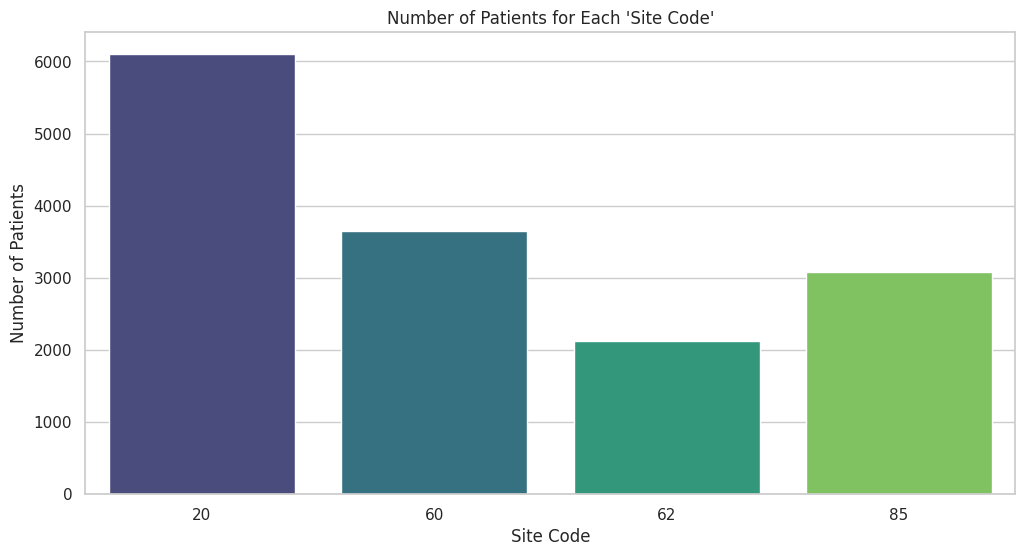

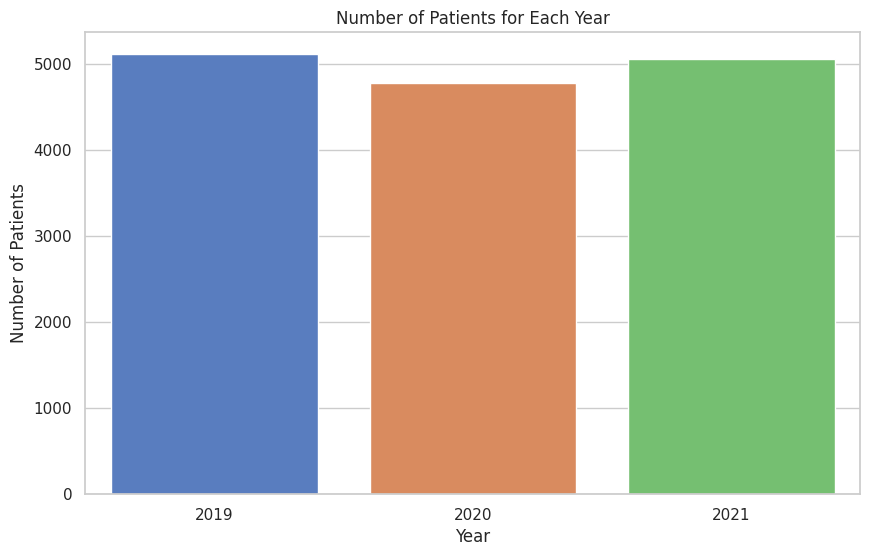

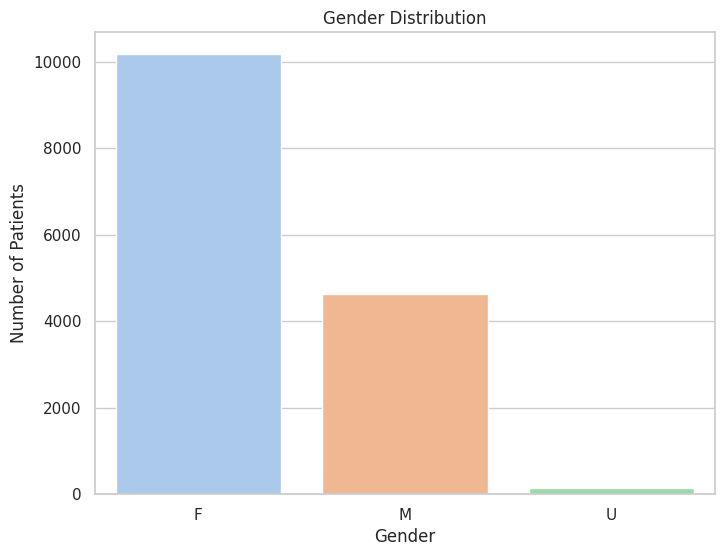

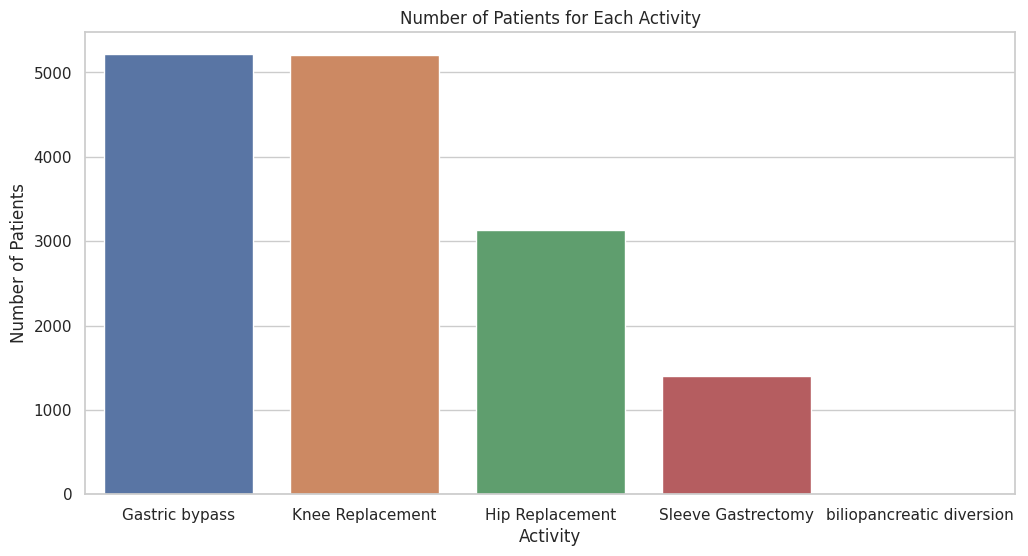

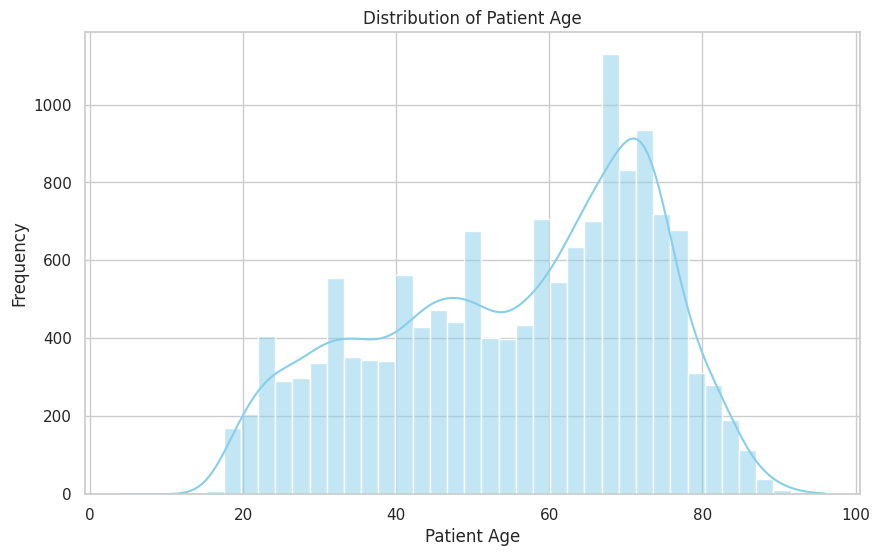

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot 1: Number of Patients for Each 'Site Code'
plt.figure(figsize=(12, 6))
sns.barplot(x=site_code_count.index, y=site_code_count.values, palette="viridis")
plt.title("Number of Patients for Each 'Site Code'")
plt.xlabel("Site Code")
plt.ylabel("Number of Patients")
plt.show()

# Plot 2: Number of Patients for Each Year
plt.figure(figsize=(10, 6))
sns.barplot(x=year_count.index, y=year_count.values, palette="muted")
plt.title("Number of Patients for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Patients")
plt.show()

# Plot 3: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=all_patient_data, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()

# Plot 4: Number of Patients for Each Activity
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_count.index, y=activity_count.values, palette="deep")
plt.title("Number of Patients for Each Activity")
plt.xlabel("Activity")
plt.ylabel("Number of Patients")
plt.show()

# Plot 5: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(all_patient_data['Patient age (on the day of surgery)'], kde=True, color="skyblue")
plt.title("Distribution of Patient Age")
plt.xlabel("Patient Age")
plt.ylabel("Frequency")
plt.show()
